In [2]:
import matplotlib.pyplot as plt
import random
import math
import statistics as st

In [3]:
%matplotlib inline

In [4]:
def flip():
    flips = random.randint(1,2)
    if flips == 1:
        
        return "H"
    else:
        return "T"
    
    

In [178]:
flip()

'H'

In [5]:
def get_results(flips=2**16):
    res = []
    count = 0
    n = 1
    
    while n <= flips:
        if flip():
            count += 1
        if math.log2(n) % 1 == 0:
            res.append((n, count))
            
        n += 1
         
        
    return res
results = list(zip(*get_results()))




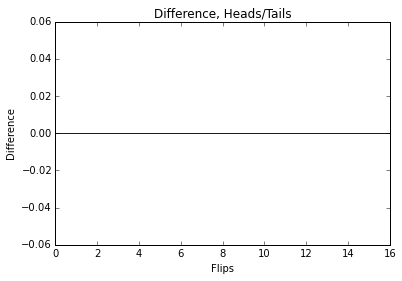

In [7]:
plt.plot()
plt.xlabel("Flips")
plt.ylabel("Difference")
plt.title("Difference, Heads/Tails")
plt.show()


In [8]:

get_results()

    
        
        

[(1, 1),
 (2, 2),
 (4, 4),
 (8, 8),
 (16, 16),
 (32, 32),
 (64, 64),
 (128, 128),
 (256, 256),
 (512, 512),
 (1024, 1024),
 (2048, 2048),
 (4096, 4096),
 (8192, 8192),
 (16384, 16384),
 (32768, 32768),
 (65536, 65536)]